In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../")

import numpy as np

from genff.data_handling.dataset import GroupDataset
from genff.visualization.plotting import plot_sample, plot_sample_no_map
import matplotlib.pyplot as plt

Loading ../data/igibson_sim_data/env_Beechwood_0_int_warped.h5
Loaded dataset with 2399 examples


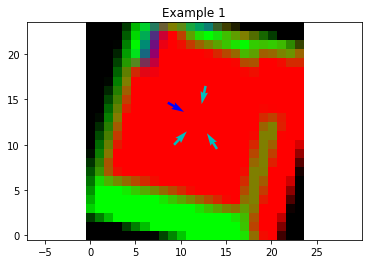

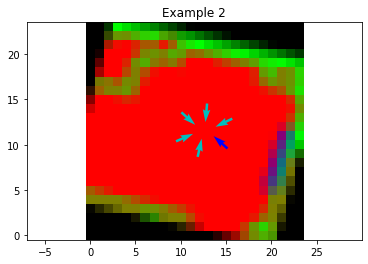

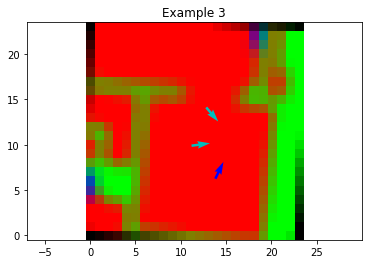

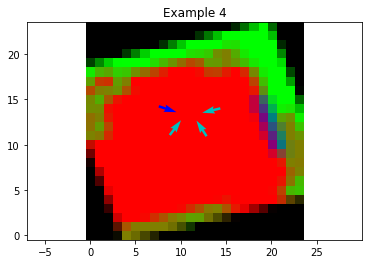

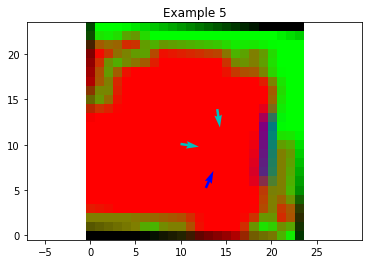

In [2]:
dataset = GroupDataset("../data/igibson_sim_data/env_Beechwood_0_int_warped.h5")
print("Loaded dataset with {} examples".format(len(dataset)))

for i in range(5):
    individual, context, mask, env = dataset[i]

    plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
    plt.axis('equal')
    plt.title("Example {}".format(i+1))
    plt.show()

In [3]:
import torch 

dataloader = torch.utils.data.DataLoader(dataset, num_workers=1, batch_size=3)
iterator = iter(dataloader)

for i in range(2):
    batch = next(iterator)

    individual, context, mask, env = batch
    print(individual)
    print(context)
    print(mask)

tensor([[[-0.8566,  0.6587,  5.7665]],

        [[ 0.7883, -0.6058,  2.4114]],

        [[ 0.4549, -1.4388,  1.1217]]])
tensor([[[-0.6850, -0.5031,  0.8076],
         [ 0.5000, -0.6170,  2.1407],
         [ 0.1850,  1.1201,  4.4983],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 0.2265,  0.6357,  4.6246],
         [ 0.9210,  0.2171,  3.5919],
         [-0.6307, -0.4083,  0.4143],
         [-0.0339, -0.8365,  1.3520],
         [-0.4830,  0.3921,  5.5494]],

        [[ 0.2024,  0.5283,  5.4176],
         [-0.2024, -0.5283,  0.1318],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]]])
tensor([[1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 0., 0., 0.]])
tensor([[[-1.1052,  0.5580,  5.9636]],

        [[ 0.1930, -1.6936,  1.1536]],

        [[ 0.0629, -1.1654,  1.4922]]])
tensor([[[ 0.5910,  0.5006,  3.3776],
         [-0.8033, -0.2342,  0.9180],
         [ 0.2123

torch.Size([24, 24, 2])
tensor([[0.0000e+00, 1.4013e-45, 9.6620e-42, 1.3379e-38, 5.3081e-36, 6.0335e-34,
         1.9649e-32, 1.8333e-31, 4.9010e-31, 3.7787e-31, 1.7136e-31, 9.0339e-31,
         2.5972e-30, 2.1514e-30, 5.1061e-31, 3.4721e-32, 6.7643e-34, 3.7756e-36,
         6.0379e-39, 2.7662e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.5032e-44, 5.8057e-40, 2.8061e-36, 3.8857e-33, 1.5416e-30, 1.7523e-28,
         5.7065e-27, 5.3244e-26, 1.4234e-25, 1.0963e-25, 4.5920e-26, 2.2353e-25,
         6.4199e-25, 5.3180e-25, 1.2622e-25, 8.5825e-27, 1.6720e-28, 9.3328e-31,
         1.4925e-33, 6.8381e-37, 8.9763e-41, 2.8026e-45, 0.0000e+00, 0.0000e+00],
        [2.8637e-39, 4.8309e-35, 2.3349e-31, 3.2332e-28, 1.2827e-25, 1.4581e-23,
         4.7483e-22, 4.4304e-21, 1.1844e-20, 9.1148e-21, 3.5484e-21, 1.5849e-20,
         4.5466e-20, 3.7662e-20, 8.9386e-21, 6.0781e-22, 1.1841e-23, 6.6095e-26,
         1.0570e-28, 4.8428e-32, 6.3570e-36, 2.3908e-40, 2.8026e-45, 0.0000e+00],
 

<ipython-input-4-6511594a4cf2>:28: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:766.)
  batch_mask = mask[b].nonzero()


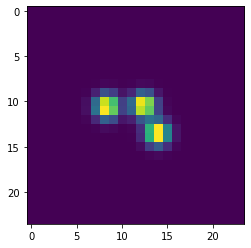

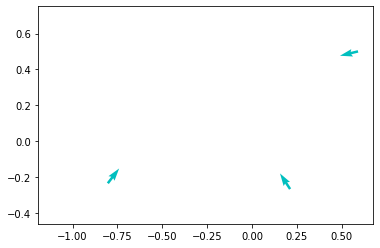

In [4]:
# batch = next(iterator)

grid_res = 0.25
grid_w = 24
grid_h = 24
sigma=0.05
x_index=0
y_index=1

individual, context, mask, _ = batch

tensor = context
B = context.shape[0]
P = context.shape[1]


xv, yv = torch.meshgrid([torch.arange(0, grid_h), torch.arange(0, grid_w)])

# we assume the value for a cell is in the middle of a cell in the grid
xv_position = xv * grid_res - (grid_h * grid_res / 2.0) + (grid_res / 2.0)
yv_position = yv * grid_res - (grid_w * grid_res / 2.0) + (grid_res / 2.0)
grid_positions = torch.stack([xv_position, yv_position], dim=2)
print(grid_positions.shape)


grid = torch.zeros((B, grid_h, grid_w))
for b in range(B):
    batch_mask = mask[b].nonzero()
    mu = tensor[b, batch_mask, [y_index, x_index]].unsqueeze(0).unsqueeze(0) # 1x1xPxF
    mu = mu.repeat(grid_h, grid_w, 1, 1) # grid_h x grid_w x P x F
    mu = mu.permute(2, 0, 1, 3) # P x grid_h x grid_w x F

    # we now compute the unnormalized gaussian: exp(-0.5 * (x - mu)^T Sigma^-1 (x - mu))
    # Sigma is a diag matrix with sigma in the diagonal. This allows us to decompose the math
    # into the following steps:
    # 1. compute the difference x - mu
    difference = (grid_positions.unsqueeze(0).repeat(batch_mask.shape[0], 1, 1, 1) - mu)
    # 2. reshape the difference into a N x 2 matrix
    d = difference.view(batch_mask.shape[0], -1, 2)
    # 3. compute (x - mu)^T Sigma^-1 (x - mu) = (1/sigma) * sum(d^2)
    n = torch.sum(torch.square(d), 2)
    e = torch.exp(- (0.5 / sigma) * n)

    grid[b, :, :] = e.sum(dim=0).view(difference.shape[1], difference.shape[2])
    
print(grid[0])
plt.imshow(grid[0])
plt.show()

plot_sample_no_map(individual[0], context[0], mask[0])
plt.axis('equal')
plt.show()